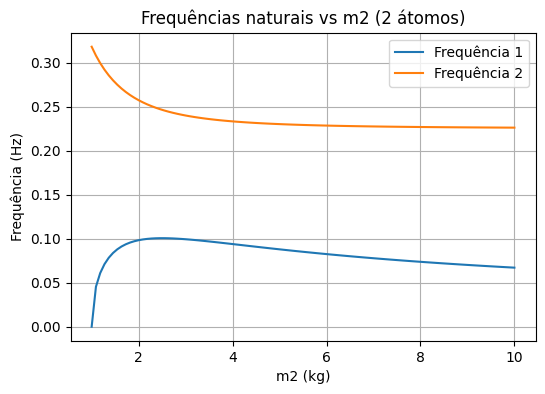

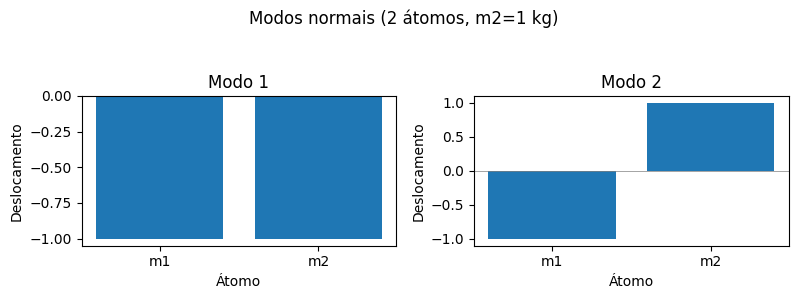

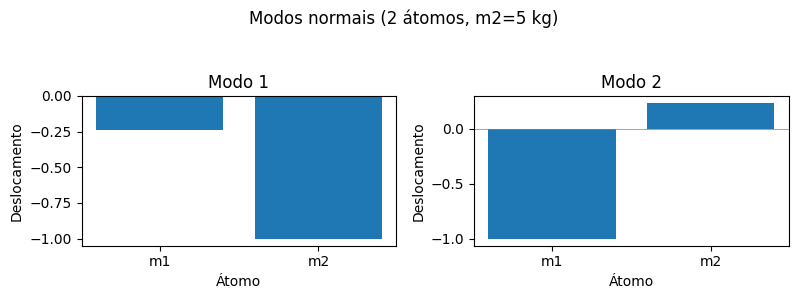

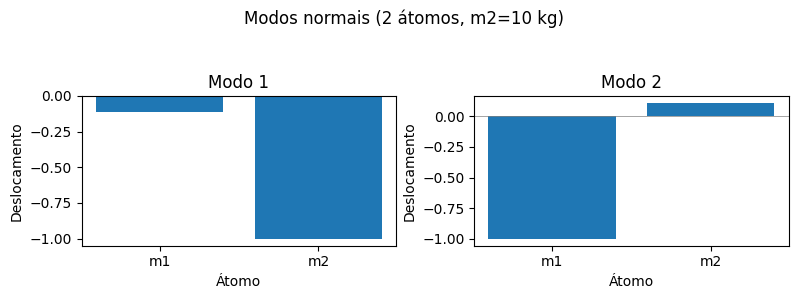

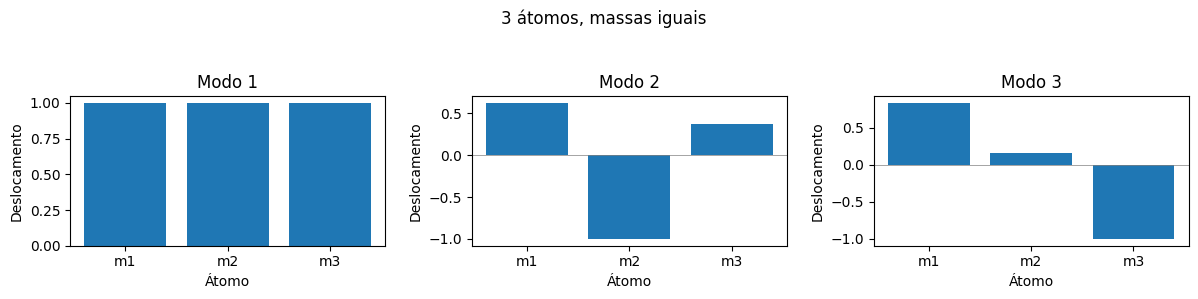

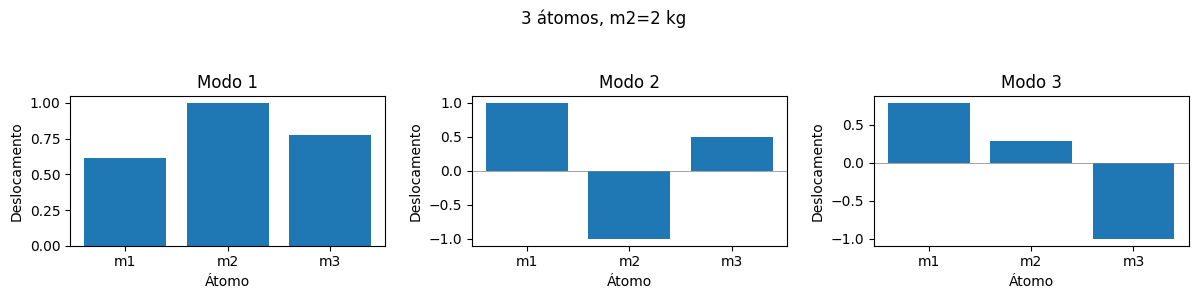

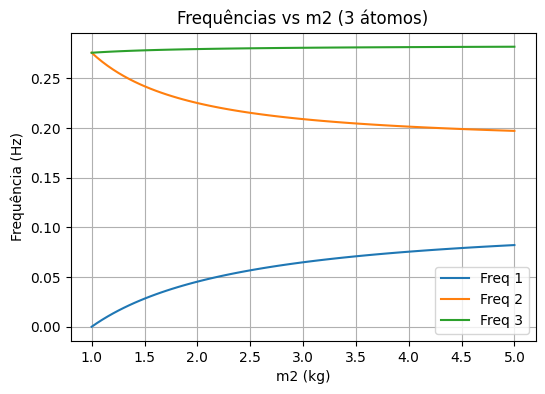

In [8]:
import numpy as np
import matplotlib.pyplot as plt


def resolver_vibracao(massas, molas):
    """
    Calcula frequências naturais e modos normais para uma cadeia linear cíclica.

    Parâmetros:
    - massas: lista de massas [m1, m2, ..., mN]
    - molas: lista de constantes elásticas [k1, k2, ..., kN]
      (k_i conecta massa i à massa i+1, com periodicidade entre N e 1)

    Retorna:
    - frequencias: array de frequências naturais (Hz), ordenadas crescente
    - modos: matriz NxN, cada coluna é um modo normal (deslocamentos normalizados)
    """
    N = len(massas)
    M = np.diag(massas)             # matriz de massa
    K = np.zeros((N, N))            # matriz de rigidez

    # Montagem da matriz K com condições de contorno periódicas
    for i in range(N):
        k_plus = molas[i]           # mola entre i e i+1
        k_minus = molas[i-1]        # mola entre i-1 e i
        K[i, i] += (k_plus + k_minus)
        K[i, (i+1) % N] -= k_plus
        K[(i+1) % N, i] -= k_plus

    Minv = np.linalg.inv(M)
    A = Minv @ K                     # matriz dinâmica

    # Resolução do problema de autovalores
    eigvals, eigvecs = np.linalg.eigh(A)
    omegas = np.sqrt(np.abs(eigvals))
    freq = omegas / (2 * np.pi)

    # Ordenar por frequência
    idx = np.argsort(freq)
    freq = freq[idx]
    modos = eigvecs[:, idx]

    # Normalizar modos (amplitude máxima = 1)
    for j in range(N):
        modos[:, j] /= np.max(np.abs(modos[:, j]))

    return freq, modos


def plotar_modos(massas, modos, titulo):
    """
    Plota modos normais como barras de deslocamento relativo.

    - massas: lista de nomes ou índices para rotular átomos
    - modos: matriz NxM de deslocamentos
    - titulo: título geral da figura
    """
    N, M = modos.shape
    fig, axes = plt.subplots(1, M, figsize=(4*M, 3), squeeze=False)

    for j in range(M):
        ax = axes[0, j]
        ax.axhline(0, color='gray', lw=0.5)
        ax.bar(np.arange(N), modos[:, j], tick_label=massas)
        ax.set_xlabel('Átomo')
        ax.set_ylabel('Deslocamento')
        ax.set_title(f'Modo {j+1}')

    plt.suptitle(titulo)
    plt.tight_layout(rect=[0, 0, 1, 0.93])
    plt.show()


if __name__ == '__main__':
    # Exemplo: 2 átomos, massas [1, m2]
    m1 = 1.0
    k = 1.0
    m2_vals = np.linspace(1, 10, 100)
    freqs2 = np.array([resolver_vibracao([m1, m2], [k, k])[0] for m2 in m2_vals])

    plt.figure(figsize=(6,4))
    plt.plot(m2_vals, freqs2[:, 0], label='Frequência 1')
    plt.plot(m2_vals, freqs2[:, 1], label='Frequência 2')
    plt.xlabel('m2 (kg)')
    plt.ylabel('Frequência (Hz)')
    plt.title('Frequências naturais vs m2 (2 átomos)')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Modos para casos específicos
    for m2 in [1, 5, 10]:
        f, modos = resolver_vibracao([m1, m2], [k, k])
        plotar_modos(['m1', 'm2'], modos,
                     f'Modos normais (2 átomos, m2={m2} kg)')

    # Exemplo: 3 átomos, massas iguais e distintas
    massas3 = [1, 1, 1]
    freq3, modos3 = resolver_vibracao(massas3, [1, 1, 1])
    plotar_modos(['m1', 'm2', 'm3'], modos3,
                 '3 átomos, massas iguais')

    massas3b = [1, 2, 1]
    freq3b, modos3b = resolver_vibracao(massas3b, [1, 1, 1])
    plotar_modos(['m1', 'm2', 'm3'], modos3b,
                 '3 átomos, m2=2 kg')

    # Variação de m2 em cadeia de 3 átomos
    m2_vals3 = np.linspace(1, 5, 80)
    freqs3 = np.array([resolver_vibracao([1, m2, 1], [1,1,1])[0]
                       for m2 in m2_vals3])
    plt.figure(figsize=(6,4))
    for i in range(3):
        plt.plot(m2_vals3, freqs3[:, i], label=f'Freq {i+1}')
    plt.xlabel('m2 (kg)')
    plt.ylabel('Frequência (Hz)')
    plt.title('Frequências vs m2 (3 átomos)')
    plt.legend()
    plt.grid(True)
    plt.show()
